In [1]:
import schemdraw
from schemdraw import logic

#schemdraw.use('svg')

### Testing compatibility using examples from https://wavedrom.com/tutorial.html

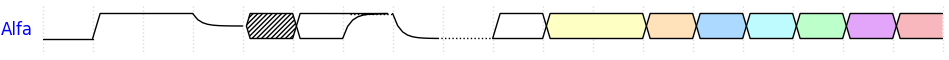

In [2]:
logic.TimingDiagram.from_json('''{ signal: [{ name: "Alfa", wave: "01.zx=ud.23.456789" }] }''')

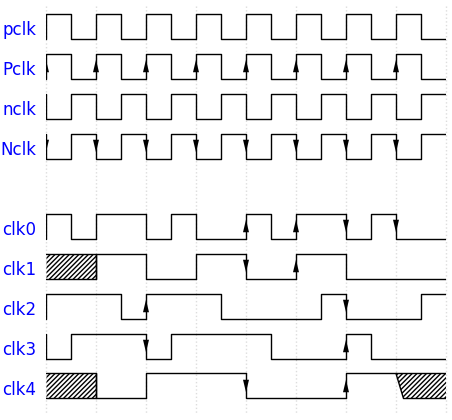

In [3]:
logic.TimingDiagram.from_json('''{ signal: [
  { name: "pclk", wave: 'p.......' },
  { name: "Pclk", wave: 'P.......' },
  { name: "nclk", wave: 'n.......' },
  { name: "Nclk", wave: 'N.......' },
  {},
  { name: 'clk0', wave: 'phnlPHNL' },
  { name: 'clk1', wave: 'xhlhLHl.' },
  { name: 'clk2', wave: 'hpHplnLn' },
  { name: 'clk3', wave: 'nhNhplPl' },
  { name: 'clk4', wave: 'xlh.L.Hx' },
]}''')

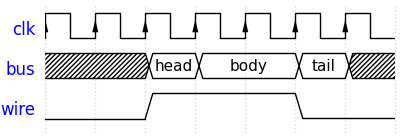

In [4]:
logic.TimingDiagram.from_json('''{ signal: [
  { name: "clk",  wave: "P......" },
  { name: "bus",  wave: "x.==.=x", data: ["head", "body", "tail", "data"] },
  { name: "wire", wave: "0.1..0." }
]}''')

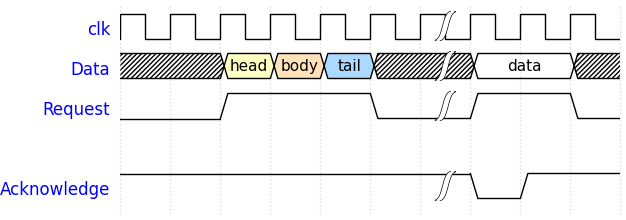

In [5]:
logic.TimingDiagram.from_json('''{ signal: [
  { name: "clk",         wave: "p.....|..." },
  { name: "Data",        wave: "x.345x|=.x", data: ["head", "body", "tail", "data"] },
  { name: "Request",     wave: "0.1..0|1.0" },
  {},
  { name: "Acknowledge", wave: "1.....|01." }
]}''')

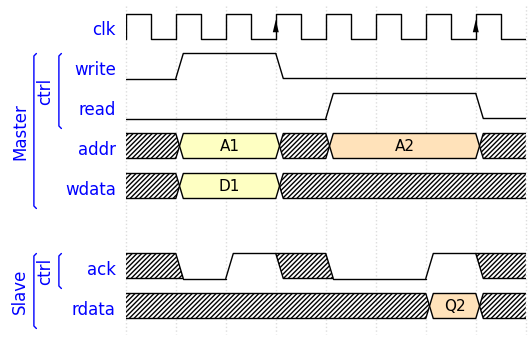

In [6]:
logic.TimingDiagram.from_json('''{ signal: [
  {    name: 'clk',   wave: 'p..Pp..P'},
  ['Master',
    ['ctrl',
      {name: 'write', wave: '01.0....'},
      {name: 'read',  wave: '0...1..0'}
    ],
    {  name: 'addr',  wave: 'x3.x4..x', data: 'A1 A2'},
    {  name: 'wdata', wave: 'x3.x....', data: 'D1'   },
  ],
  {},
  ['Slave',
    ['ctrl',
      {name: 'ack',   wave: 'x01x0.1x'},
    ],
    {  name: 'rdata', wave: 'x.....4x', data: 'Q2'},
  ]
]}''')

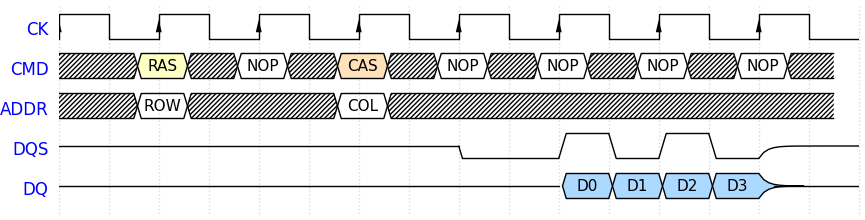

In [7]:
logic.TimingDiagram.from_json('''{ signal: [
  { name: "CK",   wave: "P.......",                                              period: 2  },
  { name: "CMD",  wave: "x.3x=x4x=x=x=x=x", data: "RAS NOP CAS NOP NOP NOP NOP", phase: 0.5 },
  { name: "ADDR", wave: "x.=x..=x........", data: "ROW COL",                     phase: 0.5 },
  { name: "DQS",  wave: "z.......0.1010z." },
  { name: "DQ",   wave: "z.........5555z.", data: "D0 D1 D2 D3" }
]}''')

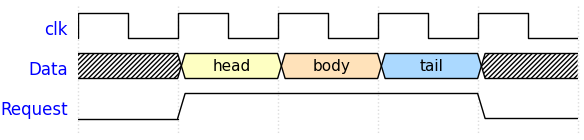

In [8]:
logic.TimingDiagram.from_json('''{ signal: [
  { name: "clk",     wave: "p...." },
  { name: "Data",    wave: "x345x",  data: ["head", "body", "tail"] },
  { name: "Request", wave: "01..0" }
  ],
  config: { hscale: 2 }
}''')

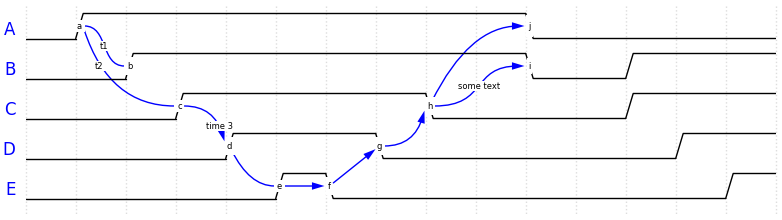

In [9]:
logic.TimingDiagram.from_json('''{ signal: [
  { name: 'A', wave: '01........0....',  node: '.a........j' },
  { name: 'B', wave: '0.1.......0.1..',  node: '..b.......i' },
  { name: 'C', wave: '0..1....0...1..',  node: '...c....h..' },
  { name: 'D', wave: '0...1..0.....1.',  node: '....d..g...' },
  { name: 'E', wave: '0....10.......1',  node: '.....ef....' }
  ],
  edge: [
    'a~b t1', 'c-~a t2', 'c-~>d time 3', 'd~-e',
    'e~>f', 'f->g', 'g-~>h', 'h~>i some text', 'h~->j'
  ]
}''', nodesize=6)

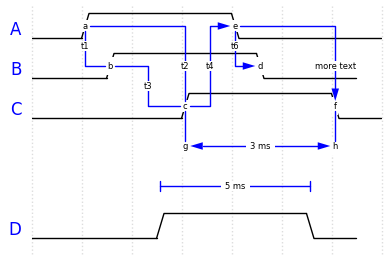

In [10]:
logic.TimingDiagram.from_json('''{ signal: [
  { name: 'A', wave: '01..0..',  node: '.a..e..' },
  { name: 'B', wave: '0.1..0.',  node: '..b..d.', phase:0.5 },
  { name: 'C', wave: '0..1..0',  node: '...c..f' },
  {                              node: '...g..h' },
  {                              node: '...I..J',  phase:0.5 },
  { name: 'D', wave: '0..1..0',  phase:0.5 }
  ],
  edge: [
    'b-|a t1', 'a-|c t2', 'b-|-c t3', 'c-|->e t4', 'e-|>f more text',
    'e|->d t6', 'c-g', 'f-h', 'g<->h 3 ms', 'I+J 5 ms'
  ]
}''', nodesize=6)

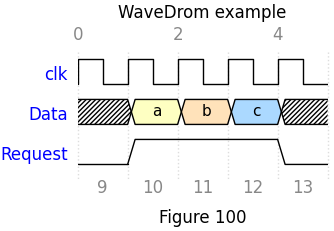

In [11]:
# Head and Foot
logic.TimingDiagram.from_json('''{signal: [
  {name:'clk',         wave: 'p....' },
  {name:'Data',        wave: 'x345x', data: 'a b c' },
  {name:'Request',     wave: '01..0' }
],
 head:{
   text:'WaveDrom example',
   tick:0,
   every:2
 },
 foot:{
   text:'Figure 100',
   tock:9
 },
}''')

### Schemdraw's extensions to WaveJSON

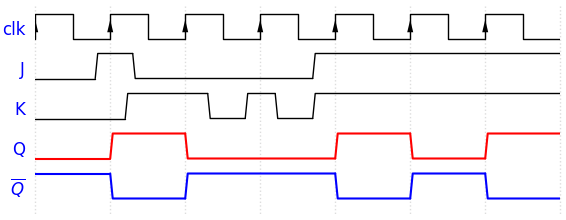

In [12]:
# Asynchronous signals defined using async parameter
# Also can set color/lw on individual signals
# (Recreates https://commons.wikimedia.org/wiki/File:JK_timing_diagram.svg)
logic.TimingDiagram(
{'signal': [
    {'name': 'clk', 'wave': 'P......'},
    {'name': 'J', 'wave': '0101', 'async': [0, .8, 1.3, 3.7, 7]},
    {'name': 'K', 'wave': '010101', 'async': [0, 1.2, 2.3, 2.8, 3.2, 3.7, 7]},
    {'name': 'Q', 'wave': '010.101', 'color': 'red', 'lw': 1.5},
    {'name': r'$\overline{Q}$', 'wave': '101.010', 'color': 'blue', 'lw': 1.5},
], 'config': {'hscale': 1.5}}, risetime=.05)

In [13]:
# Themes and colors - using schemdraw's themeing
schemdraw.theme('oceans16')

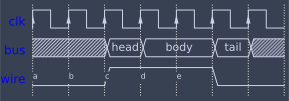

In [14]:
d = schemdraw.Drawing()  # Theme applies to drawing, not to element...
d += logic.TimingDiagram.from_json('''{ signal: [
  { name: "clk",  wave: "P......" },
  { name: "bus",  wave: "x.==.=x", data: ["head", "body", "tail", "data"] },
  { name: "wire", wave: "0.1..0.", node: 'abcde'  }
]}''')
d

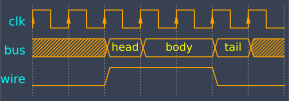

In [15]:
d = schemdraw.Drawing()
d += logic.TimingDiagram.from_json('''{ signal: [
  { name: "clk",  wave: "P......" },
  { name: "bus",  wave: "x.==.=x", data: ["head", "body", "tail", "data"] },
  { name: "wire", wave: "0.1..0." }
]}''',
                                   namecolor='cyan',
                                   datacolor='yellow',
                                   gridcolor='gray',
                                   color='orange')
d

## General robustness testing

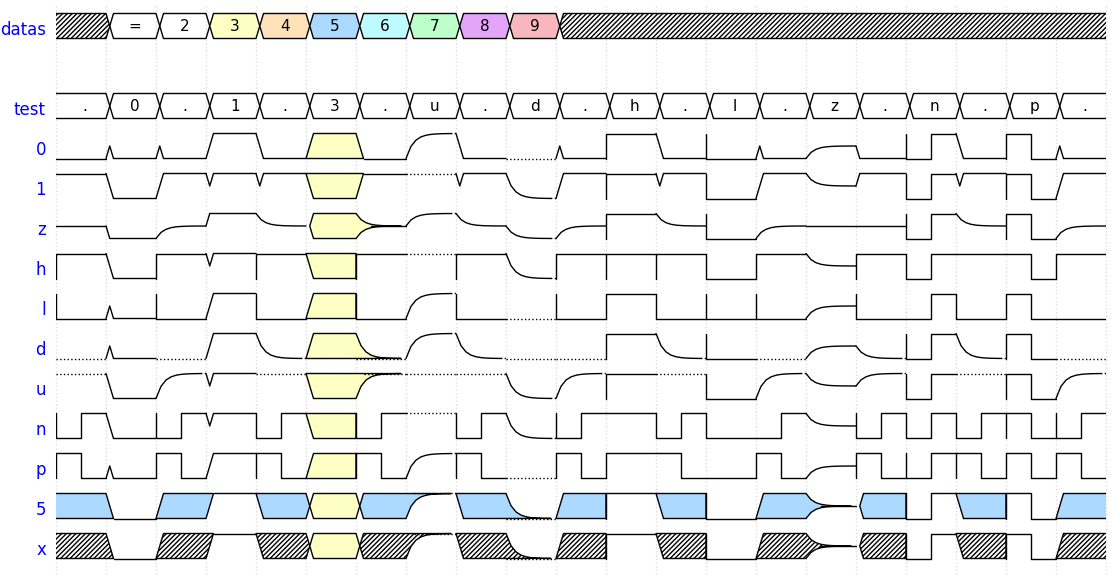

In [16]:
# Test all transitions
def testwave(c):
    return f'{c}0{c}1{c}3{c}u{c}d{c}h{c}l{c}z{c}n{c}p{c}'

logic.TimingDiagram(
    {'signal': [
        {'name': 'datas', 'wave': 'x=23456789x..........', 'data': '= 2 3 4 5 6 7 8 9'},
        {},
        {'name': 'test', 'wave': '222222222222222222222', 'data': '. 0 . 1 . 3 . u . d . h . l . z . n . p .'},
        {'name': '0', 'wave': testwave('0')},
        {'name': '1', 'wave': testwave('1')},
        {'name': 'z', 'wave': testwave('z')},
        {'name': 'h', 'wave': testwave('h')},
        {'name': 'l', 'wave': testwave('l')},
        {'name': 'd', 'wave': testwave('d')},
        {'name': 'u', 'wave': testwave('u')},
        {'name': 'n', 'wave': testwave('n')},
        {'name': 'p', 'wave': testwave('p')},
        {'name': '5', 'wave': testwave('5')},
        {'name': 'x', 'wave': testwave('x')},
    ]})

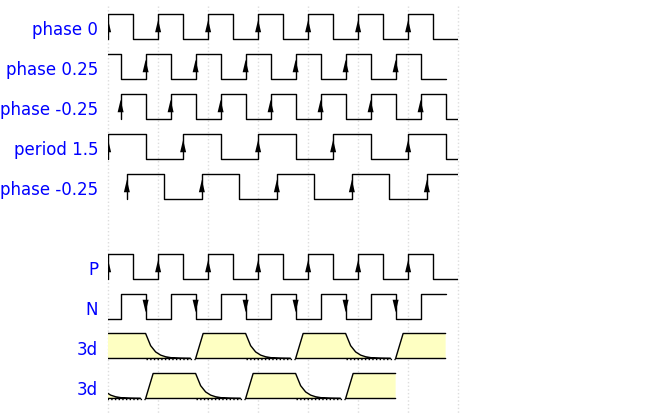

In [17]:
logic.TimingDiagram(
{'signal': [
    # Phase/period shifts
    {'name': 'phase 0', 'wave': 'P......'},
    {'name': 'phase 0.25', 'wave': 'P......', 'phase': .25},
    {'name': 'phase -0.25', 'wave': 'P......', 'phase': -.25},
    {'name': 'period 1.5', 'wave': 'P......', 'period': 1.5},
    {'name': 'phase -0.25', 'wave': 'P......', 'period': 1.5, 'phase': -0.25},
    {},
    # Check clipping of Polys
    {'name': 'P', 'wave': 'P......'},
    {'name': 'N', 'wave': 'N......', 'phase': .25},
    {'name': '3d', 'wave': '3d3d3d3', 'phase': .25},
    {'name': '3d', 'wave': '3d3d3d3', 'phase': 1.25},

]})

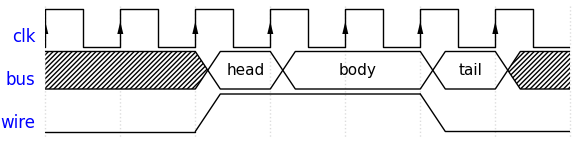

In [18]:
# Size parameters
logic.TimingDiagram.from_json('''{ signal: [
  { name: "clk",  wave: "P......" },
  { name: "bus",  wave: "x.==.=x", data: ["head", "body", "tail", "data"] },
  { name: "wire", wave: "0.1..0." }
]}''',
                             yheight=.75,
                             ygap=0.1,
                             risetime=.5)

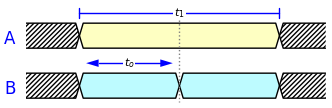

In [19]:
# Extended 'edge' notations
logic.TimingDiagram(
    {'signal': [
        {'name': 'A', 'wave': 'x3...x'},
        {'name': 'B', 'wave': 'x6.6.x'}],
     'edge': ['[0^:1]+[0^:5] $t_1$',
              '[1^:1]<->[1^:3] $t_o$',
              '[0^:3]-[1v:3]{gray,:}',
             ]},
    ygap=.5, grid=False)

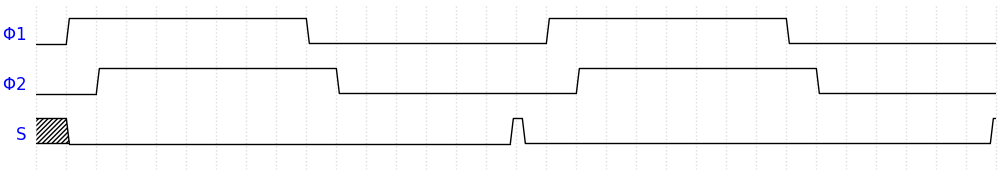

In [20]:
# Extends to 32 periods, beyond length of 'wave' string
logic.TimingDiagram(
        {'signal': [
            {'name': r'$\Phi1$', 'wave': '01010', 'async': [0, 1, 9, 17, 25, 32], 'risetime': .06},
            {'name': r'$\Phi2$', 'wave': '01010', 'async': [0, 2, 10, 18, 26, 32], 'risetime': .06},
            {'name': 'S', 'wave': 'x0101', 'async': [0, 1, 15.8, 16.2, 31.8, 32], 'risetime': .06},
        ],
        'config': {'hscale': 0.6},
    }, ygap=.5, grid=True)

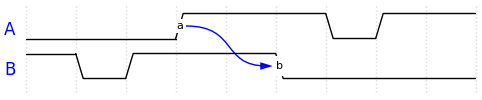

In [21]:
logic.TimingDiagram(
    {'signal': [
        {'name': 'A', 'wave': '0..1..01.', 'node': '...a.....'},
        {'name': 'B', 'wave': '101..0...', 'node': '.....b...'}],
     'edge': ['a~>b']
    })

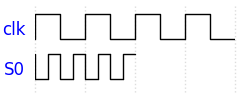

In [22]:
logic.TimingDiagram(
    {
    'signal': [
  {'name': 'clk', 'wave': 'p...'},
  {'name': 'S0',  'wave': 'lhlhlhlh', 'async': [ 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]},]
    }
)

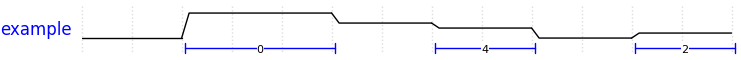

In [23]:
logic.TimingDiagram(
    {'signal': [
        {'name': 'example',
         'wave':  '0.1..1.1.0.1.',
         'level': '0....6.4...2.',
        }],
     'edge': ['[0v:2]+[0v:5] $0$',
              '[0v:7]+[0v:9] $4$',
              '[0v:11]+[0v:13] $2$'],
    })